In [3]:
from scipy.optimize import linprog as Li
c = [-72, -64]
A = [[1,1], [12,8]]
b = [[50], [480]]
bound = ((0,100/3.0), (0,None))
resp = Li(c=c,A_ub=A,b_ub=b,bounds=bound,method='simplex',options={"disp":True})
print(resp)



Optimization terminated successfully.
         Current function value: -3360.000000
         Iterations: 4
     con: array([], dtype=float64)
     fun: -3360.0
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([20., 30.])


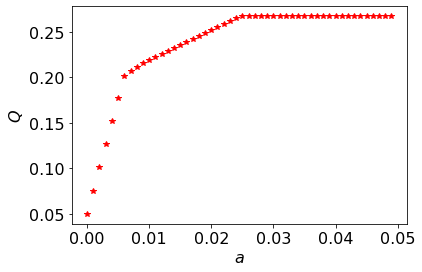

In [3]:
import matplotlib.pyplot as plt
from numpy import ones, diag, c_, zeros
from scipy.optimize import linprog
# plt.rc('text',usetex=True)
plt.rc('font',size=16)
c = [-0.05,-0.27,-0.19,-0.185,-0.185]
A = c_[zeros(4),diag([0.025,0.015,0.055,0.026])]
Aeq =[[1,1.01,1.02,1.045,1.065]]; beq = [1]
a=0; aa=[]; ss=[]
while a<0.05:
    b = ones(4)*a
    res = linprog(c,A,b,Aeq,beq)
    x = res.x; Q = -res.fun
    aa.append(a); ss.append(Q) #把最优值都保存起来
    a = a+0.001
plt.plot(aa,ss,'r*')
plt.xlabel('$a$'); plt.ylabel('$Q$',rotation=90)
plt.show()

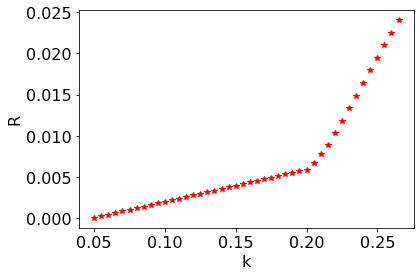

In [4]:
# 程序文件Pan5_1_2.py
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp

# plt.rc('text', usetex=True)
plt.rc('font', size=16)
x = cp.Variable(6, pos=True)
obj = cp.Minimize(x[5])
a1 = np.array([0.025, 0.015, 0.055, 0.026])
a2 = np.array([0.05, 0.27, 0.19, 0.185, 0.185])
a3 = np.array([1, 1.01, 1.02, 1.045, 1.065])
k = 0.05
kk = []
ss = []
while k < 0.27:
    con = [cp.multiply(a1, x[1:5]) - x[5] <= 0,
           a2 @ x[:-1] >= k, a3 @ x[:-1] == 1]
    prob = cp.Problem(obj, con)
    prob.solve(solver='GLPK_MI')
    kk.append(k)
    ss.append(prob.value)
    k = k + 0.005
plt.plot(kk, ss, 'r*')
plt.xlabel('k')
plt.ylabel('R', rotation=90)
plt.show()



In [12]:

# 程序文件Pan5_1_2.py
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp

# plt.rc('text', usetex=True)
plt.rc('font', size=16)
x = cp.Variable(6, pos=True)
a1 = np.array([0.025, 0.015, 0.055, 0.026])
a2 = np.array([0.05, 0.27, 0.19, 0.185, 0.185])
a3 = np.array([1, 1.01, 1.02, 1.045, 1.065])
s = 0.00
ss = []
ff = []
while s <= 1:
    obj = cp.Minimize(s*x[5] - (1-s)*sum(cp.multiply(a2,x[:-1])))
    con = [cp.multiply(a1, x[1:5]) - x[5] <= 0,
            a3 @ x[:-1] == 1]
    prob = cp.Problem(obj, con)
    prob.solve(solver='GLPK_MI')
    ss.append(s)
    ff.append(prob.value)
    s = s + 0.01
plt.plot(ss, ff, 'r*')
plt.xlabel('s')
plt.ylabel('R', rotation=90)
plt.show()






z1:
     con: array([], dtype=float64)
     fun: -5960.0
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([0., 9., 0., 0.])
  status: 0
 success: True
       x: array([14., 16., 39.,  0.])
 z2:
     con: array([], dtype=float64)
     fun: 30.0
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([ 0.,  0.,  0., 18.])
  status: 0
 success: True
       x: array([20., 10., 30.,  0.])
